## Importing the necessary packages ##

In [50]:
import pandas as pd 
import numpy as np 
import re 
import sys
import matplotlib.pyplot as plt
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [51]:
project_path = 'C:/Users/JU486WK/OneDrive - EY\Desktop/Talent Hypothesis/'
file_name ='Jul Aug joiner detailsFY 23.xlsx'

In [52]:
df = pd.read_excel('C:/Users/JU486WK/OneDrive - EY\Desktop/Talent Hypothesis/Jul Aug joiner detailsFY 23.xlsx', sheet_name='Relocation')

In [53]:
df

,OfferId,OverallStatus,Status,Hiretype,OldGPN,TaleoRequisitionId,ID,Sl3,TaleoCandidateId,RecruiterName,RecruiterGPN,Title,FirstName,LastName,DateOfBirth,Address1,Address2,City,State,PinCode,Phone,Email,Source,SubSource,ReferralEmployeeName,ReferralEmployeeGPN,IsEyk,DepartmentName,ServiceLine,SubServiceLine,DepartmentCode,Entity,DepartmentDisplayName,Codeblock,SetId,Center,Facility,Rank,Grade,Designation,IsRotationalShift,NoticePeriod,Qualification,GoodsTransportationTravelEligibility,CounselorName,CounselorGPN,ActualJoiningDate,EmployeeId,GPN,GUI
0,141294,Joined,OfferAccepted,New Employee - PostJune,NaN,750204,GDS ES,LSS,2241699,Viknesh R,XE021301732,Mr,Sumit,Kakkar,1985-04-16,"G-27/190, Sector-3, Rohini",Near Saint Giri Sr. Sec. Shool,Delhi,New Delhi,110085,+91 9811711173,sum.designer@gmail.com,PORTAL,TALEO,NaN,NaN,False,LSS_GD_AL_Amr,CBS,Talent Team,988569,EYGBS (India) LLP,LSS_GD_AL_Amr,XE050-01006-00184-0904344,ING09,Gurgaon,GGN DLF/All Entities/Non-SEZ,64,1,Assistant Manager,True,2,B.A,Eligible for Domestic Relocation,Lakshman Rajagopalan,XE020M54407,2022-08-03,3272056,XE020145714,3272056
1,141933,Joined,OfferAccepted,New Employee - PostJune,NaN,672821,GDS ES,F&A,2226848,Jyothi Sumathy Thampy,XE020113046,Ms,Veena,B S,1994-05-04,"#301, 2nd FLOOR, SIRI CRYSTAL,4TH MAIN ROAD","CHIKKALSANDRA, UTTARAHALLI, NEAR SHANTI SAGA",Bengaluru,Karnataka,560061,+91 9164870857,vnasharma2@gmail.com,CONSULTANCY,ANRI SOLUTIONS,NaN,NaN,False,F&A EDS Bangalore,CBS,EDS,990121,EYGBS (India) LLP,F&A EDS Bangalore,XE011-01244-00801-0907322,ING09,Bangalore,BLR BMP/All Entities/NON-SEZ,66,3,Advanced Finance Analyst,False,2,B.Tech,Eligible for Domestic Relocation,Renji Krishna,XE021300653,2022-07-11,3278318,XE020146663,3278318
2,149168,Joined,OfferAccepted,New Employee - PostJune,NaN,929702,GDS ES,MBA,2422388,Shajo Kalliath,XE020140338,Mr,Thrinesh,Reddy Giddannagari,1992-03-31,"Vill-42, Harmoney Home,Lal Gadi Malakpet","Shameerpet, near YPS Hospital",Hyderabad,TELANGANA,500078,+91 9666887977,thrinesh917@gmail.com,CONSULTANCY,INTELLECT CAREER SOLUTIONS,NaN,NaN,False,Ops Mgt_Reg&SL_UKI,CBS,"Brand,Market&Communications",989359,EYGBS (India) LLP,Ops Mgt_Reg&SL_UKI,XE049-01006-00184-0911203,ING09,Bangalore,BLR BMP/All Entities/NON-SEZ,65,2,Senior Associate,False,2,Commerce,Eligible for Domestic Relocation,Tittu Jacob,XE021309480,2022-07-04,3309975,XE020151375,3309975
3,142136,Joined,OfferAccepted,New Employee - PostJune,NaN,493542,GDS ES,MBA,2472149,Rahul Bhattacharjeeallupadam Angajan,XE020125200,Mr,Naba,Kishor Bag,1991-05-28,"At-G10/302, Provident Welworth City, Marasandr...",Near PKB English high school,Bengaluru,Karnataka,561203,9692313720,nabakishorbag@gmail.com,PORTAL,TALEO,NaN,NaN,False,AccMgmt_PAM_USCen,CBS,Markets&Business Development,989394,EYGBS (India) LLP,AccMgmt_PAM_USCen,XE049-29667-00184-0911002,ING09,Gurgaon,GGN DLFCP/All Entities/Non-SEZ,65,2,Senior Associate,False,2,MBA,Eligible for Domestic Relocation,Sandeep Reddy Gopu,XE020119276,2022-08-01,3280138,XE020146859,3280138
4,141916,Joined,OfferAccepted,New Employee - PostJune,NaN,931421,GDS ES,PSCM,2138054,Viknesh R,XE021301732,Ms,Rekha,Singh,1991-02-15,"Flat No 99 , Kailash Apartment","IP Extension, Max Hospital",Delhi,Delhi,110092,+91 9958309579,singhrekha1591@gmail.com,RPO,Allegis,NaN,NaN,False,GDS Exp Mgmt - Consulting,CBS,Talent Team,991097,EYGBS (India) LLP,CBS,XE069-00269-00184-0904347,ING09,Gurgaon,GGN DLFCP/All Entities/Non-SEZ,64,1,Assistant Manager,True,2,Btech,Eligible for Domestic Relocation,Varunchand Palanisamy,IN010M23403,2022-07-11,3278834,XE020146721,3278834
5,142207,Joined,OfferAccepted,New Employee - PostJune,NaN,430681,GDS ES,LSS,2453207,Viknesh R,XE021301732,Ms,Deepti,Jain,1985-07-01,"661, 2nd Floor, Niti Khand 1 Indirapuram",Near Sawaranjayanti park,Ghaziabad,Uttar Pradesh,201014,+91 7838356065,d_jain07@yahoo.com,PORTAL,TALEO,NaN,NaN,False,LSS_GD_GL,CBS,Talent Team,101113,EYGBS (India) LLP,LSS_GD_GL,XE050-01006-00184-0904344,ING09,Gurgaon,GGN DLFCP/All Entities/Non-

In [54]:
! pip install xlrd

In [10]:
pip install xlrd==1.2.0

     ------------------------------------ 103.3/103.3 kB 989.5 kB/s eta 0:00:00
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1
Note: you may need to restart the kernel to use updated packages.


In [55]:
df.columns

Index(['OfferId', 'OverallStatus', 'Status', 'Hiretype', 'OldGPN',
       'TaleoRequisitionId', 'ID', 'Sl3', 'TaleoCandidateId', 'RecruiterName',
       'RecruiterGPN', 'Title', 'FirstName', 'LastName', 'DateOfBirth',
       'Address1', 'Address2', 'City', 'State', 'PinCode', 'Phone', 'Email',
       'Source', 'SubSource', 'ReferralEmployeeName', 'ReferralEmployeeGPN',
       'IsEyk', 'DepartmentName', 'ServiceLine', 'SubServiceLine',
       'DepartmentCode', 'Entity', 'DepartmentDisplayName', 'Codeblock',
       'SetId', 'Center', 'Facility', 'Rank', 'Grade', 'Designation',
       'IsRotationalShift', 'NoticePeriod', 'Qualification',
       'GoodsTransportationTravelEligibility', 'CounselorName', 'CounselorGPN',
       'ActualJoiningDate', 'EmployeeId', 'GPN', 'GUI'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 50 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   OfferId                               77 non-null     int64         
 1   OverallStatus                         77 non-null     object        
 2   Status                                77 non-null     object        
 3   Hiretype                              77 non-null     object        
 4   OldGPN                                13 non-null     object        
 5   TaleoRequisitionId                    77 non-null     int64         
 6   ID                                    77 non-null     object        
 7   Sl3                                   77 non-null     object        
 8   TaleoCandidateId                      77 non-null     int64         
 9   RecruiterName                         77 non-null     object        
 10  Recr

In [57]:
## Check missing value ##
df.isnull().sum()

OfferId                                  0
OverallStatus                            0
Status                                   0
Hiretype                                 0
OldGPN                                  64
TaleoRequisitionId                       0
ID                                       0
Sl3                                      0
TaleoCandidateId                         0
RecruiterName                            0
RecruiterGPN                             0
Title                                    0
FirstName                                0
LastName                                 3
DateOfBirth                              0
Address1                                 0
Address2                                 0
City                                     0
State                                    0
PinCode                                  0
Phone                                    0
Email                                    0
Source                                   0
SubSource  

In [58]:
## Creating a new dataframe ##
df_new = df[['Hiretype','Sl3','City','State','Source','SubSource','ServiceLine','SubServiceLine','DepartmentDisplayName','Center','Rank','Designation','NoticePeriod','IsRotationalShift','Qualification']]

In [59]:
df_new

,Hiretype,Sl3,City,State,Source,SubSource,ServiceLine,SubServiceLine,DepartmentDisplayName,Center,Rank,Designation,NoticePeriod,IsRotationalShift,Qualification
0,New Employee - PostJune,LSS,Delhi,New Delhi,PORTAL,TALEO,CBS,Talent Team,LSS_GD_AL_Amr,Gurgaon,64,Assistant Manager,2,True,B.A
1,New Employee - PostJune,F&A,Bengaluru,Karnataka,CONSULTANCY,ANRI SOLUTIONS,CBS,EDS,F&A EDS Bangalore,Bangalore,66,Advanced Finance Analyst,2,False,B.Tech
2,New Employee - PostJune,MBA,Hyderabad,TELANGANA,CONSULTANCY,INTELLECT CAREER SOLUTIONS,CBS,"Brand,Market&Communications",Ops Mgt_Reg&SL_UKI,Bangalore,65,Senior Associate,2,False,Commerce
3,New Employee - PostJune,MBA,Bengaluru,Karnataka,PORTAL,TALEO,CBS,Markets&Business Development,AccMgmt_PAM_USCen,Gurgaon,65,Senior Associate,2,False,MBA
4,New Employee - PostJune,PSCM,Delhi,Delhi,RPO,Allegis,CBS,Talent Team,CBS,Gurgaon,64,Assistant Manager,2,True,Btech
5,New Employee - PostJune,LSS,Ghaziabad,Uttar Pradesh,PORTAL,TALEO,CBS,Talent Team,LSS_GD_GL,Gurgaon,65,Senior Associate,2,True,Diploma in Commercial Art
6,New Employee - PostJune,Service Excellence,Kolkata,West Bengal,CONSULTANCY,COVENANT CONSULTANTS,CBS,Allocations and Other Costs,Service Excellence,Bangalore,66,Analyst,2,True,Btech
7,New Employee - PostJune,MBA,Bengaluru,Karnataka,PORTAL,TALEO,CBS,Markets&Business Development,PE_PM_Assur_MENA,Bangalore,65,Senior Associate,2,False,B.Tech
8,New Employee - PostJune,MBA,Palakkad,Kerala,CONSULTANCY,INTELLECT CAREER SOLUTIONS,CBS,"Brand,Market&Communications",Ops Mgt_Reg&SL_UKI,Kochi,65,Senior Associate,2,False,B.Tech
9,New Employee - PostJune,Service Excellence,Deoghar,Jharkhand,CONSULTANCY,ENRICH & ENLIGHT,CBS,Allocations and Other Costs,Service Excellence,Bangalore,63,Assistant Director,3,False,MBA


In [60]:
## Checking the Center wise relocation ##
center_list = list(df_new.Center.unique())
center_list

['Gurgaon', 'Bangalore', 'Kochi', 'Trivandrum']

## State Wise value counts ##

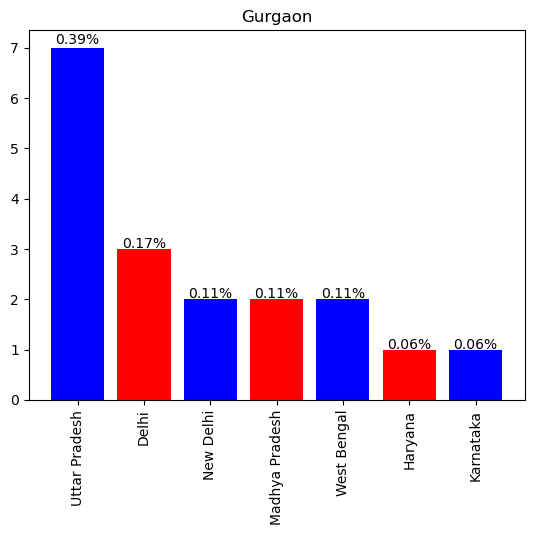

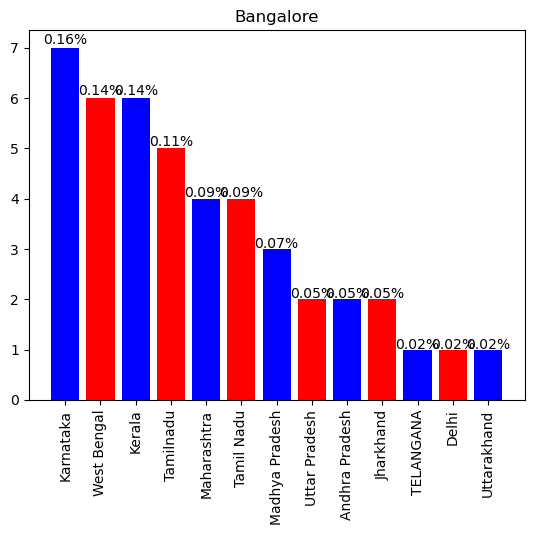

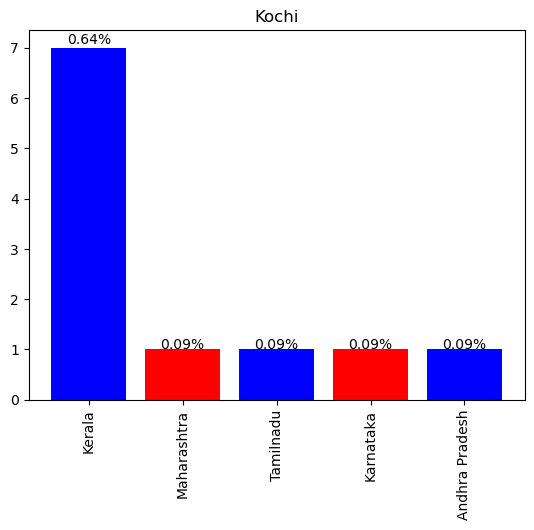

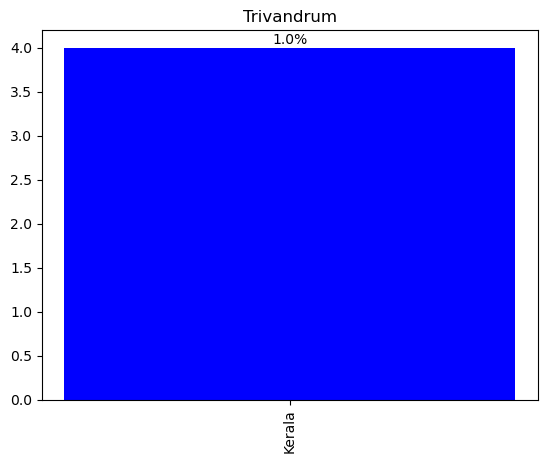

[4]

In [98]:
import matplotlib.pyplot as plt

for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['State'].value_counts()
    state_names = list(val.index)
    state_count = list(val.values)
    #name = ["Gurgaon"]
    
    color_list = []
    for i in range(0,len(state_names),2):
        color_list.append("blue")
        if i+1 != len(state_names):
            color_list.append("red")
    barchart = plt.bar(state_names, state_count, color = color_list)
    #plt.bar(name, city_count)
    for bc, name in zip(barchart, state_names):
        dt1 = df_new[df_new['Center']==center]
        dt2 = dt1[dt1['State']==name] #'Uttar Pradesh']
        percentage = len(dt2)/len(dt1)
        
        width = bc.get_width()
        height = bc.get_height()
        x, y = bc.get_xy()
        plt.text(x + width/2, y + height * 1.01, str(round(percentage, 2)) + '%', ha='center')
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
state_count

In [94]:
state_names

['Uttar Pradesh',
 'Delhi',
 'New Delhi',
 'Madhya Pradesh',
 'West Bengal',
 'Haryana',
 'Karnataka']

In [91]:
dt1 = df_new[df_new['Center']=='Gurgaon']
dt2 = dt1[dt1['State']=='Uttar Pradesh']
percentage = len(dt2)/len(dt1)
percentage

0.3888888888888889

In [78]:
dt2 = df_new[np.logical_and(df_new['Center']=='Gurgaon', df_new['State']=='Uttar Pradesh')]

In [82]:
len(dt2)

7

In [83]:
percentage = len(dt2)/len(dt1)

In [84]:
percentage

0.3888888888888889

In [12]:
results = df_new.groupby(['Center', 'State']).count().sort_values(by='Center',ascending=True)

In [13]:
results

Hiretype  Sl3  City  Source  SubSource  \
Center     State                                                    
Bangalore  Andhra Pradesh         2    2     2       2          2   
           Uttarakhand            1    1     1       1          1   
           Uttar Pradesh          2    2     2       2          2   
           Tamilnadu              5    5     5       5          5   
           Tamil Nadu             4    4     4       4          4   
           TELANGANA              1    1     1       1          1   
           West Bengal            6    6     6       6          6   
           Madhya Pradesh         3    3     3       3          3   
           Kerala                 6    6     6       6          6   
           Karnataka              7    7     7       7          7   
           Jharkhand              2    2     2       2          2   
           Delhi                  1    1     1       1          1   
           Maharashtra            4    4     4       4          4   
Gurgaon    West Bengal            2    2     2       2          2   
           Uttar Pradesh          7    7     7       7          7   
           New Delhi              2    2     2       2          2   
           Madhya Pradesh         2    2     2       2          2   
           Haryana                1    1     1       1          1   
           Delhi                  3    3     3       3          3   
           Karnataka              1    1     1       1          1   
Kochi      Tamilnadu              1    1     1       1          1   
           Andhra Pradesh         1    1     1       1          1   
           Karnataka              1    1     1       1          1   
           Kerala                 7    7     7       7          7   
           Maharashtra            1    1     1       1          1   
Trivandrum Kerala                 4    4     4       4          4   

                           ServiceLine  SubServiceLine  DepartmentDisplayName  \
Center     State                                                                
Bangalore  Andhra Pradesh            2               2                      2   
           Uttarakhand               1               1                      1   
           Uttar Pradesh             2               2                      2   
           Tamilnadu                 5               5                      5   
           Tamil Nadu                4               4                      4   
           TELANGANA                 1               1                      1   
           West Bengal               6               6                      6   
           Madhya Pradesh            3               3                      3   
           Kerala                    6               6                      6   
           Karnataka                 7               7                      7   
           Jharkhand                 2               2                      2   
           Delhi                     1               1                      1   
           Maharashtra               4               4                      4   
Gurgaon    West Bengal               2               2                      2   
           Uttar Pradesh             7               7                      7   
           New Delhi                 2               2                      2   
           Madhya Pradesh            2               2                      2   
           Haryana                   1               1                      1   
           Delhi                     3               3                      3   
           Karnataka                 1               1                      1   
Kochi      Tamilnadu                 1               1                      1   
           Andhra Pradesh            1               1                      1   
           Karnataka                 1               1                      1   
           Kerala                    7               7               

In [14]:
results

Hiretype  Sl3  City  Source  SubSource  \
Center     State                                                    
Bangalore  Andhra Pradesh         2    2     2       2          2   
           Uttarakhand            1    1     1       1          1   
           Uttar Pradesh          2    2     2       2          2   
           Tamilnadu              5    5     5       5          5   
           Tamil Nadu             4    4     4       4          4   
           TELANGANA              1    1     1       1          1   
           West Bengal            6    6     6       6          6   
           Madhya Pradesh         3    3     3       3          3   
           Kerala                 6    6     6       6          6   
           Karnataka              7    7     7       7          7   
           Jharkhand              2    2     2       2          2   
           Delhi                  1    1     1       1          1   
           Maharashtra            4    4     4       4          4   
Gurgaon    West Bengal            2    2     2       2          2   
           Uttar Pradesh          7    7     7       7          7   
           New Delhi              2    2     2       2          2   
           Madhya Pradesh         2    2     2       2          2   
           Haryana                1    1     1       1          1   
           Delhi                  3    3     3       3          3   
           Karnataka              1    1     1       1          1   
Kochi      Tamilnadu              1    1     1       1          1   
           Andhra Pradesh         1    1     1       1          1   
           Karnataka              1    1     1       1          1   
           Kerala                 7    7     7       7          7   
           Maharashtra            1    1     1       1          1   
Trivandrum Kerala                 4    4     4       4          4   

                           ServiceLine  SubServiceLine  DepartmentDisplayName  \
Center     State                                                                
Bangalore  Andhra Pradesh            2               2                      2   
           Uttarakhand               1               1                      1   
           Uttar Pradesh             2               2                      2   
           Tamilnadu                 5               5                      5   
           Tamil Nadu                4               4                      4   
           TELANGANA                 1               1                      1   
           West Bengal               6               6                      6   
           Madhya Pradesh            3               3                      3   
           Kerala                    6               6                      6   
           Karnataka                 7               7                      7   
           Jharkhand                 2               2                      2   
           Delhi                     1               1                      1   
           Maharashtra               4               4                      4   
Gurgaon    West Bengal               2               2                      2   
           Uttar Pradesh             7               7                      7   
           New Delhi                 2               2                      2   
           Madhya Pradesh            2               2                      2   
           Haryana                   1               1                      1   
           Delhi                     3               3                      3   
           Karnataka                 1               1                      1   
Kochi      Tamilnadu                 1               1                      1   
           Andhra Pradesh            1               1                      1   
           Karnataka                 1               1                      1   
           Kerala                    7               7               

In [15]:
results = df_new.groupby('Center')['State'].count().sort_values(ascending=False)

In [16]:
results

Center
Bangalore     44
Gurgaon       18
Kochi         11
Trivandrum     4
Name: State, dtype: int64

In [17]:
df_new.groupby('Center').State.agg(['count']).sort_values(by = ['count'], ascending=False)

,count
Center,
Bangalore,44
Gurgaon,18
Kochi,11
Trivandrum,4


## City Wise value counts ##

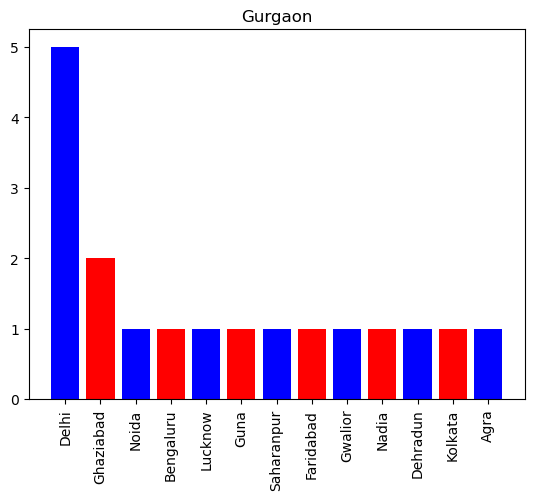

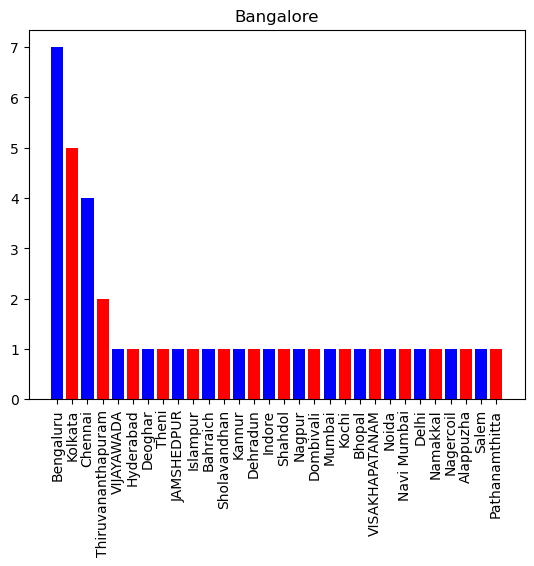

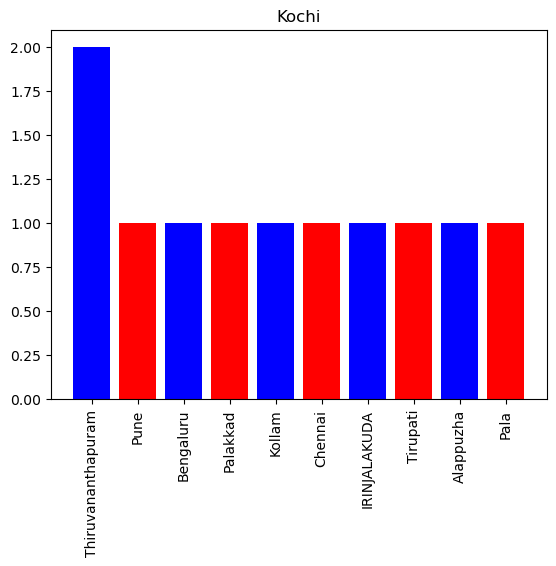

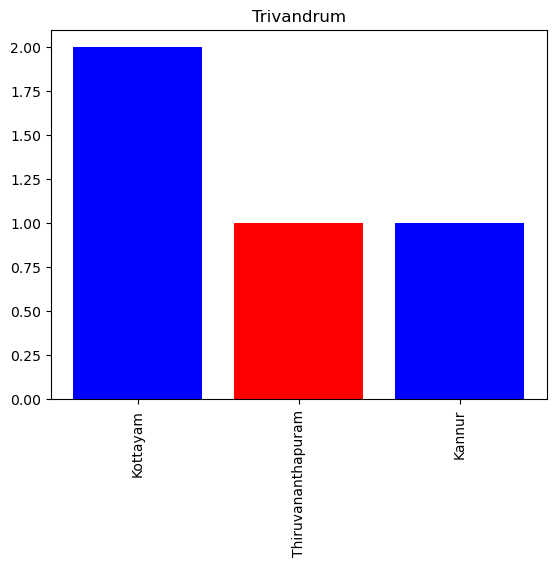

[2, 1, 1]

In [32]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['City'].value_counts()
    city_names = list(val.index)
    city_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(city_names),2):
        color_list.append("blue")
        if i+1 != len(city_names):
            color_list.append("red")
    plt.bar(city_names, city_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
city_count

## Hiretype base value counts ##

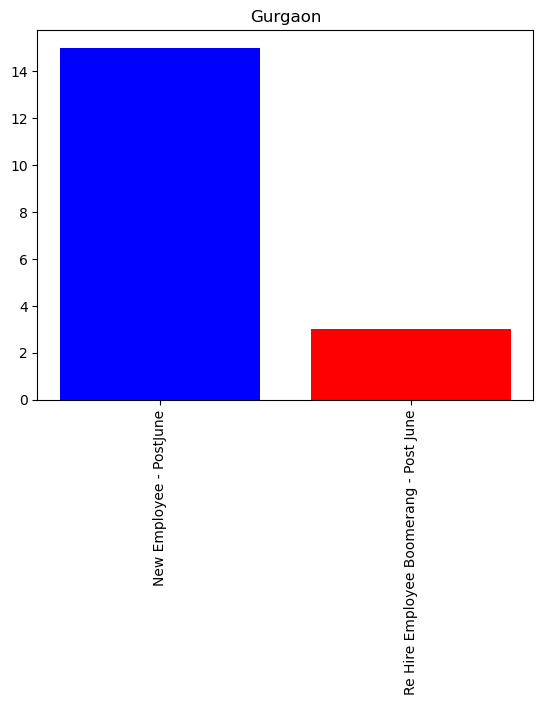

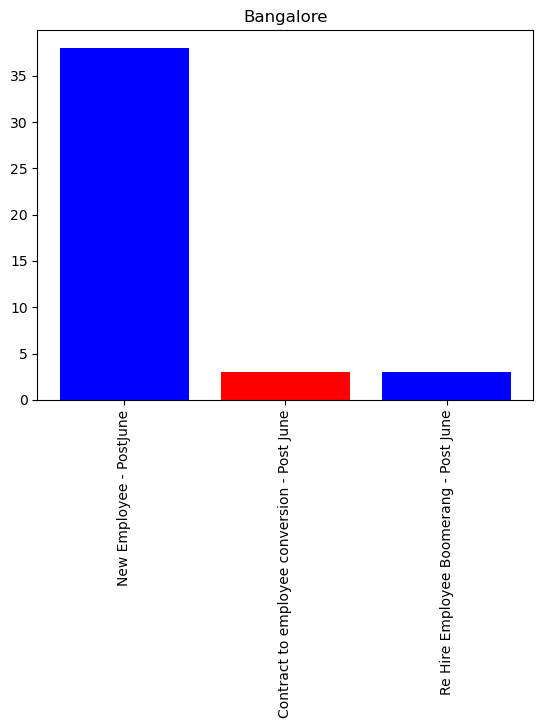

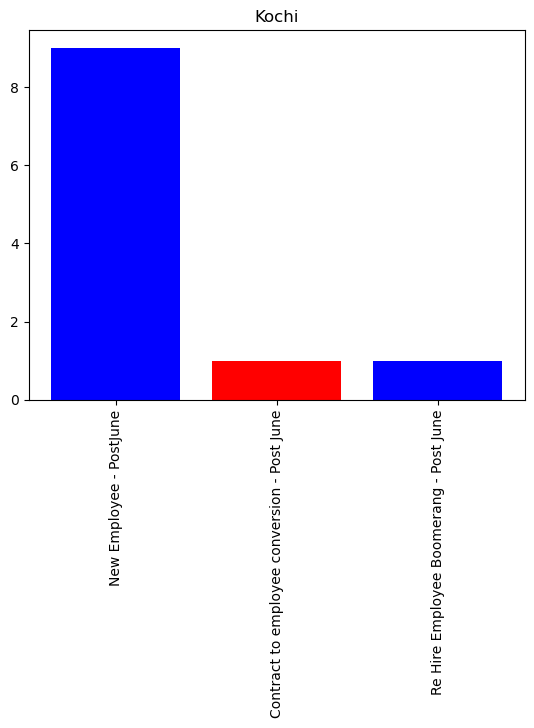

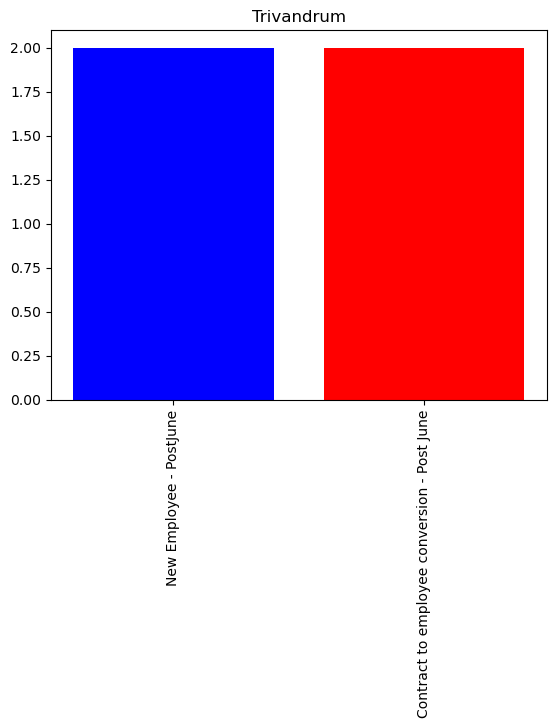

[2, 2]

In [18]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['Hiretype'].value_counts()
    hiretype_names = list(val.index)
    hiretype_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(hiretype_names),2):
        color_list.append("blue")
        if i+1 != len(hiretype_names):
            color_list.append("red")
    plt.bar(hiretype_names, hiretype_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
hiretype_count

In [19]:
results_1 = df_new.groupby(['Center', 'Hiretype']).count().sort_values(by='Center',ascending=True)

In [20]:
results_1

Sl3  City  State  \
Center     Hiretype                                                        
Bangalore  Contract to employee conversion - Post June    3     3      3   
           New Employee - PostJune                       38    38     38   
           Re Hire Employee Boomerang - Post June         3     3      3   
Gurgaon    New Employee - PostJune                       15    15     15   
           Re Hire Employee Boomerang - Post June         3     3      3   
Kochi      Contract to employee conversion - Post June    1     1      1   
           New Employee - PostJune                        9     9      9   
           Re Hire Employee Boomerang - Post June         1     1      1   
Trivandrum Contract to employee conversion - Post June    2     2      2   
           New Employee - PostJune                        2     2      2   

                                                        Source  SubSource  \
Center     Hiretype                                                         
Bangalore  Contract to employee conversion - Post June       3          3   
           New Employee - PostJune                          38         38   
           Re Hire Employee Boomerang - Post June            3          3   
Gurgaon    New Employee - PostJune                          15         15   
           Re Hire Employee Boomerang - Post June            3          3   
Kochi      Contract to employee conversion - Post June       1          1   
           New Employee - PostJune                           9          9   
           Re Hire Employee Boomerang - Post June            1          1   
Trivandrum Contract to employee conversion - Post June       2          2   
           New Employee - PostJune                           2          2   

                                                        ServiceLine  \
Center     Hiretype                                                   
Bangalore  Contract to employee conversion - Post June            3   
           New Employee - PostJune                               38   
           Re Hire Employee Boomerang - Post June                 3   
Gurgaon    New Employee - PostJune                               15   
           Re Hire Employee Boomerang - Post June                 3   
Kochi      Contract to employee conversion - Post June            1   
           New Employee - PostJune                                9   
           Re Hire Employee Boomerang - Post June                 1   
Trivandrum Contract to employee conversion - Post June            2   
           New Employee - PostJune                                2   

                                                        SubServiceLine  \
Center     Hiretype                                                      
Bangalore  Contract to employee conversion - Post June               3   
           New Employee - PostJune                                  38   
           Re Hire Employee Boomerang - Post June                    3   
Gurgaon    New Employee - PostJune                                  15   
           Re Hire Employee Boomerang - Post June                    3   
Kochi      Contract to employee conversion - Post June               1   
           New Employee - PostJune                                   9   
           Re Hire Employee Boomerang - Post June                    1   
Trivandrum Contract to employee conversion - Post June               2   
           New Employee - PostJune                                   2   

                                                        DepartmentDisplayName  \
Center     Hiretype                                                             
Bangalore  Contract to employee conversion - Post June                      3   
           New Employee - PostJune                                         38   
           Re Hire Employee Boomerang - Post June                           3   
Gurgaon    New Employee - PostJune                                     

## SI3 value counts ##

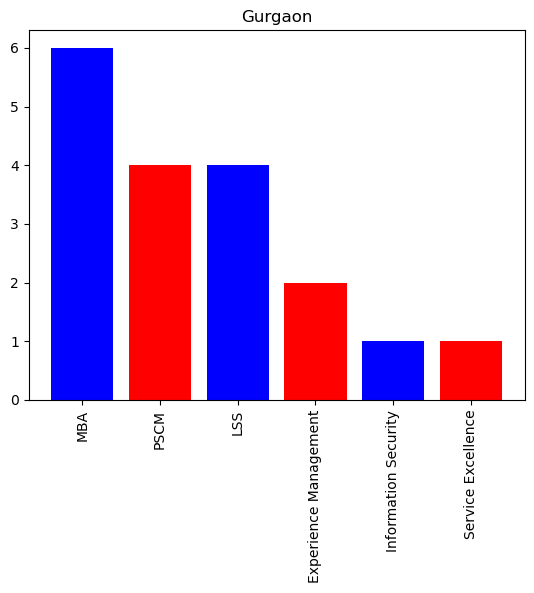

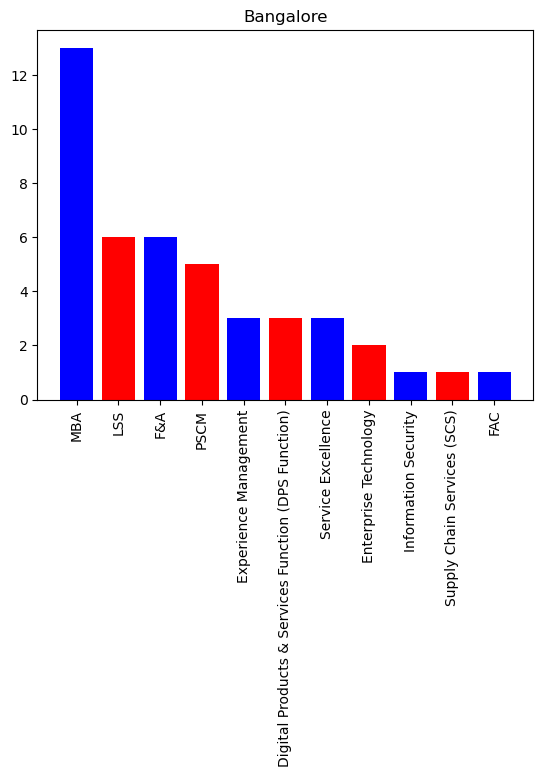

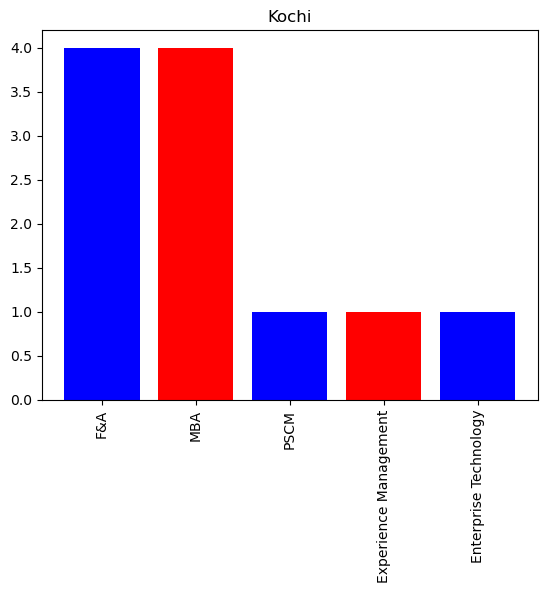

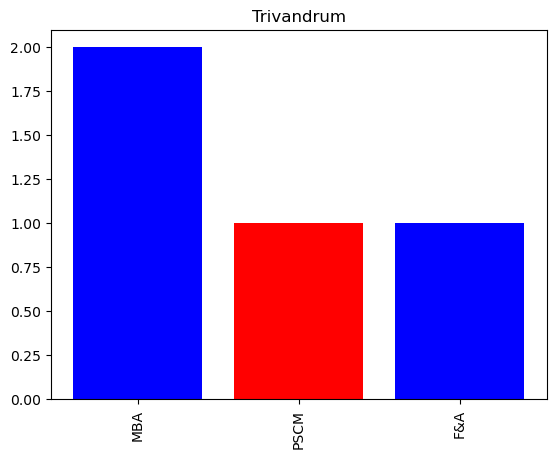

NameError: name 'SI3_count' is not defined

In [21]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['Sl3'].value_counts()
    Sl3_names = list(val.index)
    Sl3_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(Sl3_names),2):
        color_list.append("blue")
        if i+1 != len(Sl3_names):
            color_list.append("red")
    plt.bar(Sl3_names, Sl3_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
SI3_count

In [62]:
results_3= df_new.groupby(['Center', 'Sl3']).count().sort_values(by='Center',ascending=True)

In [63]:
results_3

Hiretype  City  \
Center     Sl3                                                                  
Bangalore  Digital Products & Services Function (DPS Funct...         3     3   
           Enterprise Technology                                      2     2   
           Experience Management                                      3     3   
           F&A                                                        6     6   
           FAC                                                        1     1   
           Information Security                                       1     1   
           LSS                                                        6     6   
           MBA                                                       13    13   
           PSCM                                                       5     5   
           Service Excellence                                         3     3   
           Supply Chain Services (SCS)                                1     1   
Gurgaon    Service Excellence                                         1     1   
           PSCM                                                       4     4   
           MBA                                                        6     6   
           Information Security                                       1     1   
           Experience Management                                      2     2   
           LSS                                                        4     4   
Kochi      Enterprise Technology                                      1     1   
           Experience Management                                      1     1   
           F&A                                                        4     4   
           MBA                                                        4     4   
           PSCM                                                       1     1   
Trivandrum MBA                                                        2     2   
           F&A                                                        1     1   
           PSCM                                                       1     1   

                                                               State  Source  \
Center     Sl3                                                                 
Bangalore  Digital Products & Services Function (DPS Funct...      3       3   
           Enterprise Technology                                   2       2   
           Experience Management                                   3       3   
           F&A                                                     6       6   
           FAC                                                     1       1   
           Information Security                                    1       1   
           LSS                                                     6       6   
           MBA                                                    13      13   
           PSCM                                                    5       5   
           Service Excellence                                      3       3   
           Supply Chain Services (SCS)                             1       1   
Gurgaon    Service Excellence                                      1       1   
           PSCM                                                    4       4   
           MBA                                                     6       6   
           Information Security                                    1       1   
           Experience Management                                   2       2   
           LSS                                                     4       4   
Kochi      Enterprise Technology                                   1       1   
           Experience Management                                   1       1   
           F&A                                                     4       4   
           MBA                                                     4       4   
           PSCM                    

## Source related value counts ##

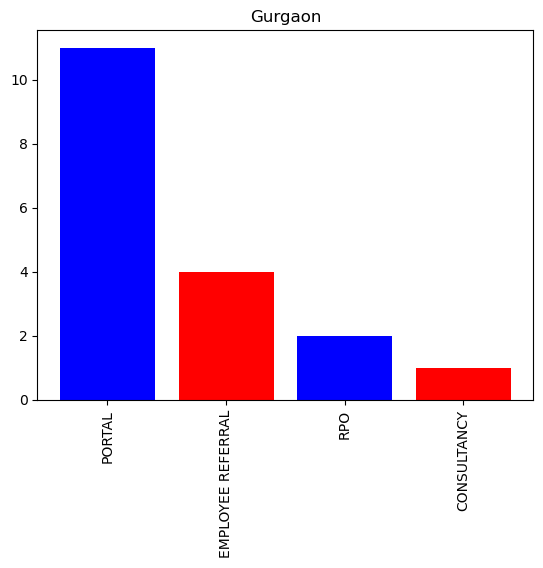

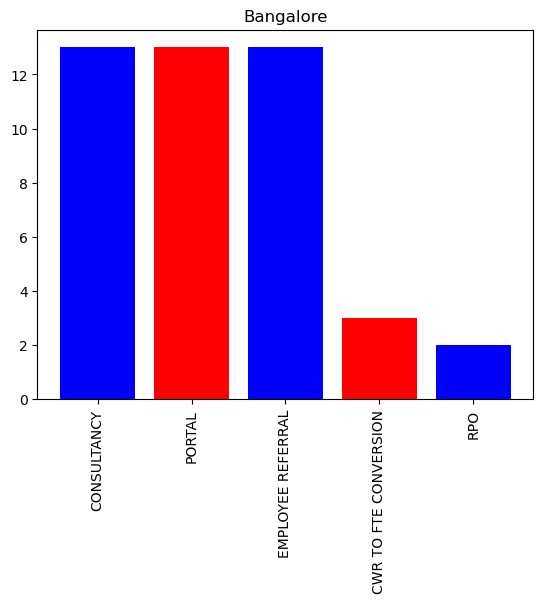

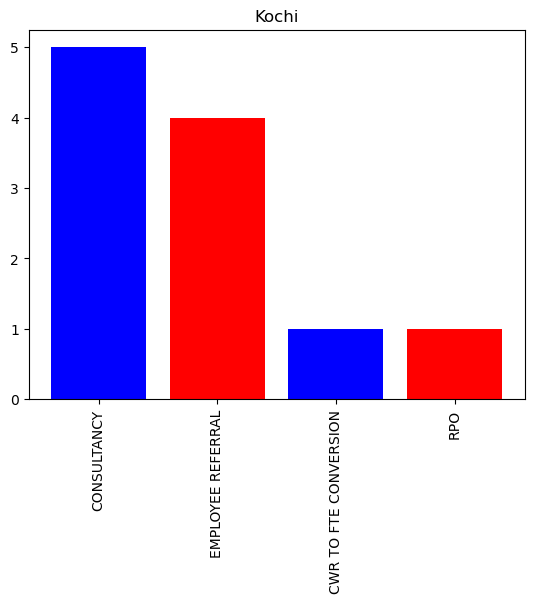

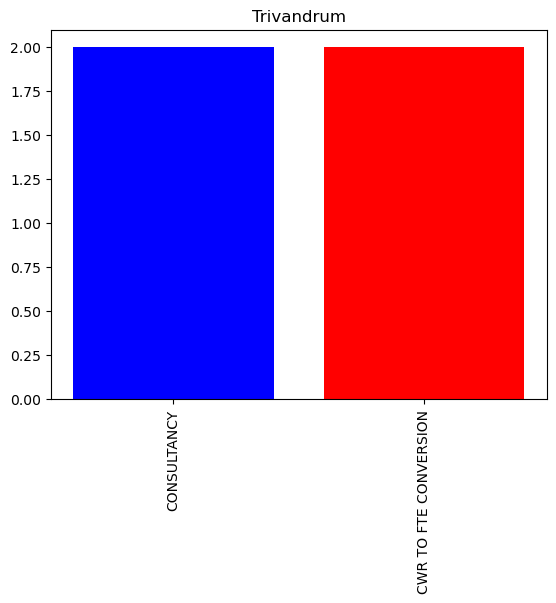

[2, 2]

In [23]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['Source'].value_counts()
    source_names = list(val.index)
    source_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(source_names),2):
        color_list.append("blue")
        if i+1 != len(source_names):
            color_list.append("red")
    plt.bar(source_names, source_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
source_count

In [64]:
results_4 = df_new.groupby(['Center', 'Source']).count().sort_values(by='Center',ascending=True)

In [65]:
results_4

Hiretype  Sl3  City  State  SubSource  \
Center     Source                                                         
Bangalore  CONSULTANCY                  13   13    13     13         13   
           CWR TO FTE CONVERSION         3    3     3      3          3   
           EMPLOYEE REFERRAL            13   13    13     13         13   
           PORTAL                       13   13    13     13         13   
           RPO                           2    2     2      2          2   
Gurgaon    CONSULTANCY                   1    1     1      1          1   
           EMPLOYEE REFERRAL             4    4     4      4          4   
           PORTAL                       11   11    11     11         11   
           RPO                           2    2     2      2          2   
Kochi      CONSULTANCY                   5    5     5      5          5   
           CWR TO FTE CONVERSION         1    1     1      1          1   
           EMPLOYEE REFERRAL             4    4     4      4          4   
           RPO                           1    1     1      1          1   
Trivandrum CONSULTANCY                   2    2     2      2          2   
           CWR TO FTE CONVERSION         2    2     2      2          2   

                                  ServiceLine  SubServiceLine  \
Center     Source                                               
Bangalore  CONSULTANCY                     13              13   
           CWR TO FTE CONVERSION            3               3   
           EMPLOYEE REFERRAL               13              13   
           PORTAL                          13              13   
           RPO                              2               2   
Gurgaon    CONSULTANCY                      1               1   
           EMPLOYEE REFERRAL                4               4   
           PORTAL                          11              11   
           RPO                              2               2   
Kochi      CONSULTANCY                      5               5   
           CWR TO FTE CONVERSION            1               1   
           EMPLOYEE REFERRAL                4               4   
           RPO                              1               1   
Trivandrum CONSULTANCY                      2               2   
           CWR TO FTE CONVERSION            2               2   

                                  DepartmentDisplayName  Rank  Designation  \
Center     Source                                                            
Bangalore  CONSULTANCY                               13    13           13   
           CWR TO FTE CONVERSION                      3     3            3   
           EMPLOYEE REFERRAL                         13    13           13   
           PORTAL                                    13    13           13   
           RPO                                        2     2            2   
Gurgaon    CONSULTANCY                                1     1            1   
           EMPLOYEE REFERRAL                          4     4            4   
           PORTAL                                    11    11           11   
           RPO                                        2     2            2   
Kochi      CONSULTANCY                                5     5            5   
           CWR TO FTE CONVERSION                      1     1            1   
           EMPLOYEE REFERRAL                          4     4            4   
           RPO                                        1     1            1   
Trivandrum CONSULTANCY                                2     2            2   
           CWR TO FTE CONVERSION                      2     2            2   

                                  NoticePeriod  IsRotationalShift  \
Center     Source                                                   
Bangalore  CONSULTANCY                      13                 13   
           CWR TO FTE CONVERSION             3                  3   
           EMPLOYEE REFERRAL                13   

## ServiceLine value counts ##

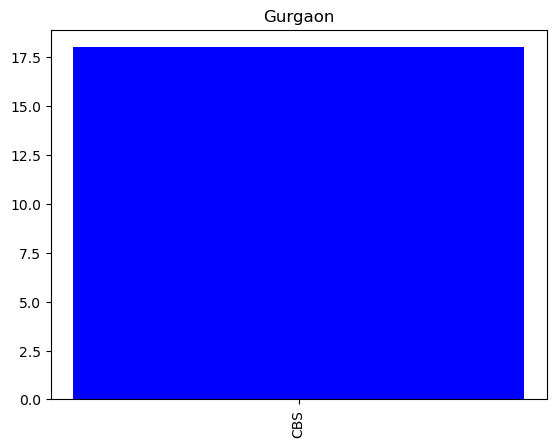

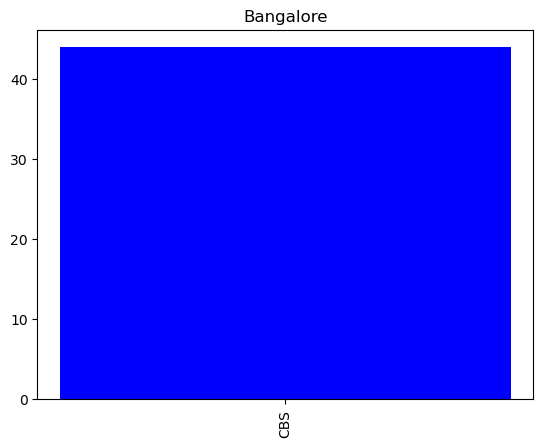

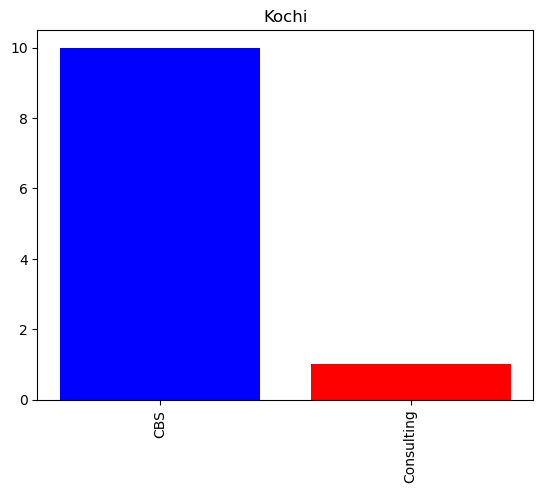

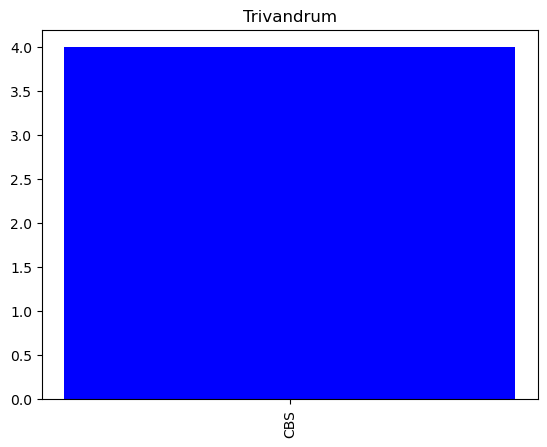

[4]

In [26]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['ServiceLine'].value_counts()
    serviceline_names = list(val.index)
    serviceline_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(serviceline_names),2):
        color_list.append("blue")
        if i+1 != len(serviceline_names):
            color_list.append("red")
    plt.bar(serviceline_names, serviceline_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
serviceline_count

## SubServiceLine value counts ##

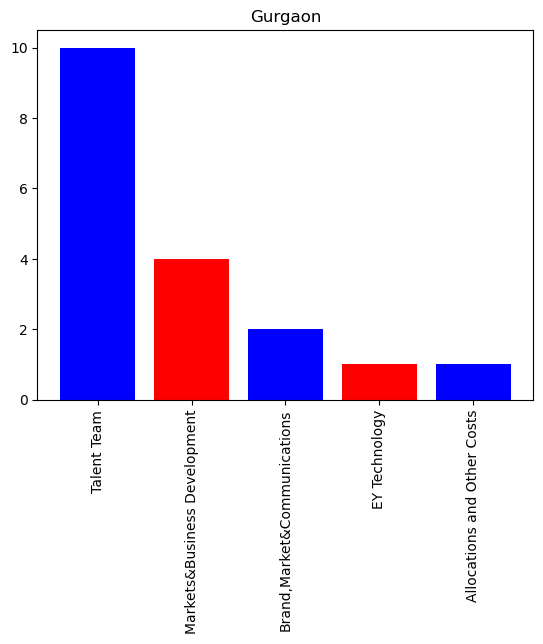

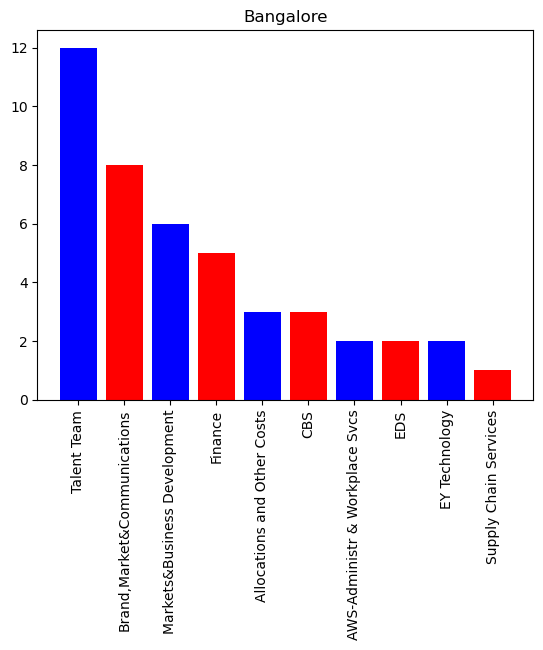

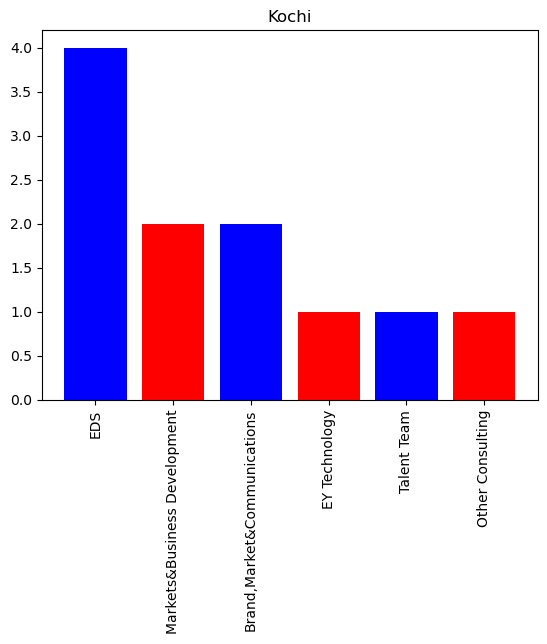

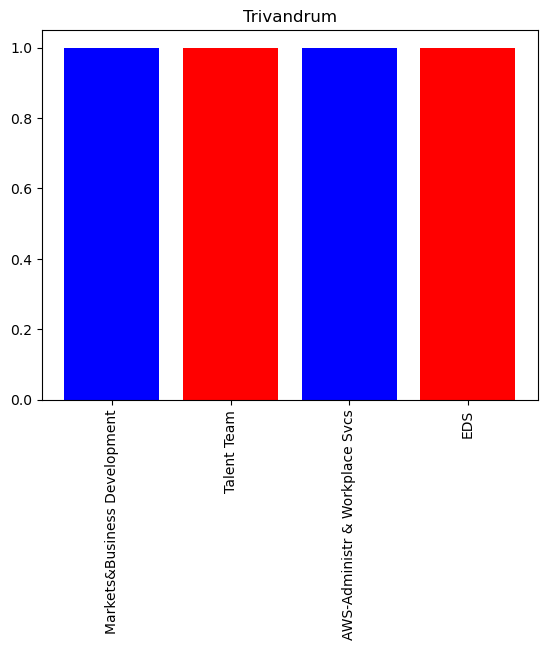

[1, 1, 1, 1]

In [27]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['SubServiceLine'].value_counts()
    subserviceline_names = list(val.index)
    subserviceline_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(subserviceline_names),2):
        color_list.append("blue")
        if i+1 != len(subserviceline_names):
            color_list.append("red")
    plt.bar(subserviceline_names, subserviceline_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
subserviceline_count

In [66]:
results_5 = df_new.groupby(['Center', 'SubServiceLine']).count().sort_values(by='Center',ascending=True)

In [67]:
results_5

Hiretype  Sl3  City  State  Source  \
Center     SubServiceLine                                                       
Bangalore  AWS-Administr & Workplace Svcs         2    2     2      2       2   
           Allocations and Other Costs            3    3     3      3       3   
           Brand,Market&Communications            8    8     8      8       8   
           CBS                                    3    3     3      3       3   
           EDS                                    2    2     2      2       2   
           EY Technology                          2    2     2      2       2   
           Finance                                5    5     5      5       5   
           Markets&Business Development           6    6     6      6       6   
           Supply Chain Services                  1    1     1      1       1   
           Talent Team                           12   12    12     12      12   
Gurgaon    Talent Team                           10   10    10     10      10   
           Markets&Business Development           4    4     4      4       4   
           EY Technology                          1    1     1      1       1   
           Brand,Market&Communications            2    2     2      2       2   
           Allocations and Other Costs            1    1     1      1       1   
Kochi      Brand,Market&Communications            2    2     2      2       2   
           EDS                                    4    4     4      4       4   
           EY Technology                          1    1     1      1       1   
           Markets&Business Development           2    2     2      2       2   
           Other Consulting                       1    1     1      1       1   
           Talent Team                            1    1     1      1       1   
Trivandrum AWS-Administr & Workplace Svcs         1    1     1      1       1   
           EDS                                    1    1     1      1       1   
           Markets&Business Development           1    1     1      1       1   
           Talent Team                            1    1     1      1       1   

                                           SubSource  ServiceLine  \
Center     SubServiceLine                                           
Bangalore  AWS-Administr & Workplace Svcs          2            2   
           Allocations and Other Costs             3            3   
           Brand,Market&Communications             8            8   
           CBS                                     3            3   
           EDS                                     2            2   
           EY Technology                           2            2   
           Finance                                 5            5   
           Markets&Business Development            6            6   
           Supply Chain Services                   1            1   
           Talent Team                            12           12   
Gurgaon    Talent Team                            10           10   
           Markets&Business Development            4            4   
           EY Technology                           1            1   
           Brand,Market&Communications             2            2   
           Allocations and Other Costs             1            1   
Kochi      Brand,Market&Communications             2            2   
           EDS                                     4            4   
           EY Technology                           1            1   
           Markets&Business Development            2            2   
           Other Consulting                        1            1   
           Talent Team                             1            1   
Trivandrum AWS-Administr & Workplace Svcs          1            1   
           EDS                                     1            1   
           Markets&Business Development            1            1   
           Talent Team                             1         

## Rank Wise Value Counts ##

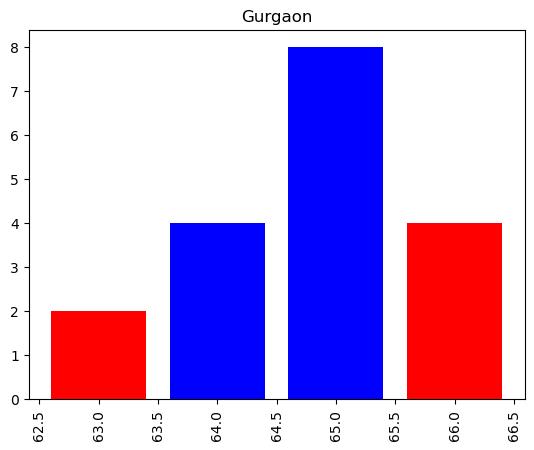

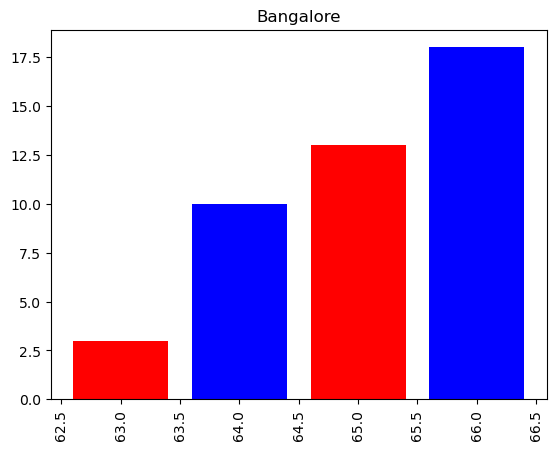

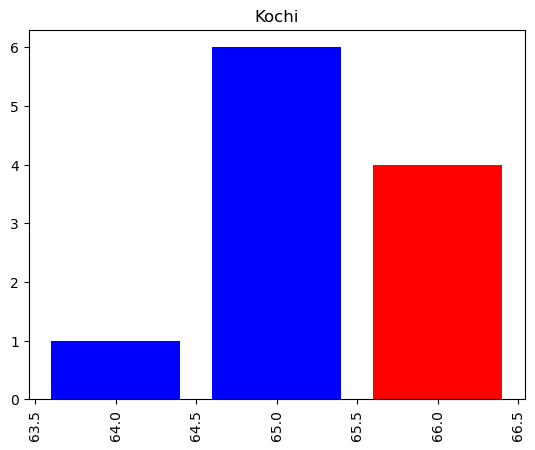

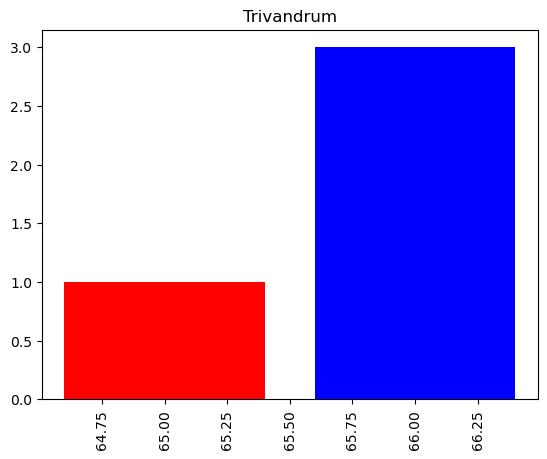

[3, 1]

In [70]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['Rank'].value_counts()
    rank_names = list(val.index)
    rank_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(rank_names),2):
        color_list.append("blue")
        if i+1 != len(rank_names):
            color_list.append("red")
    plt.bar(rank_names, rank_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
rank_count

## Designation wise value counts ##

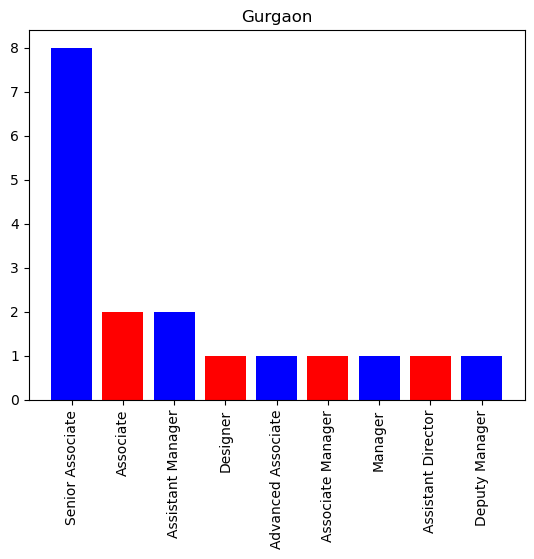

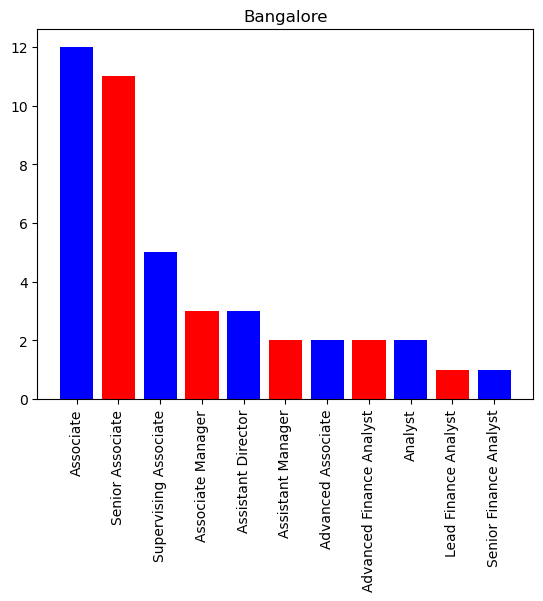

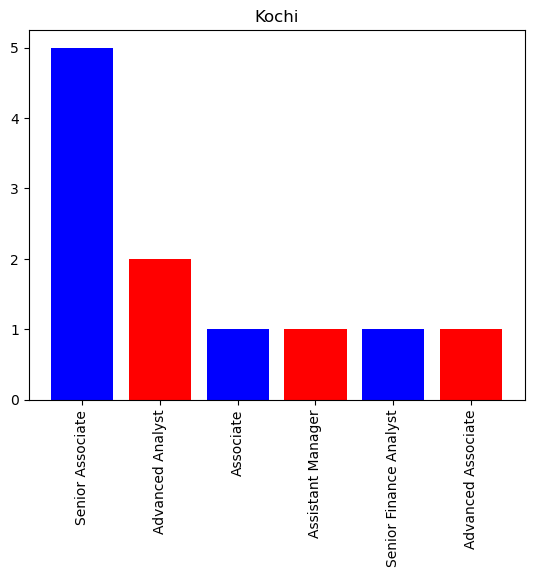

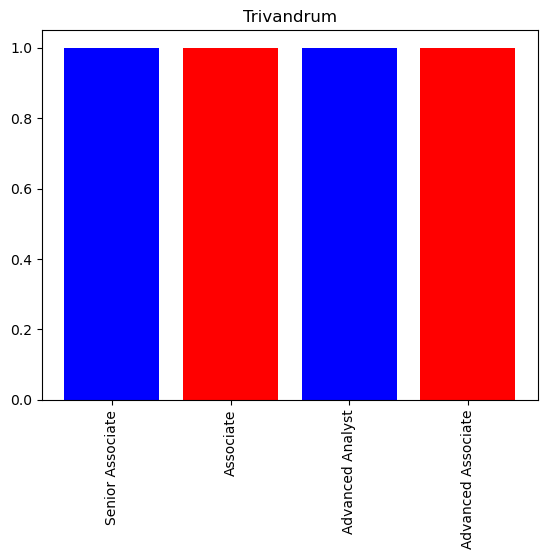

[1, 1, 1, 1]

In [28]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['Designation'].value_counts()
    designation_names = list(val.index)
    designation_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(designation_names),2):
        color_list.append("blue")
        if i+1 != len(designation_names):
            color_list.append("red")
    plt.bar(designation_names, designation_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()
designation_count

In [68]:
results_6 = df_new.groupby(['Center', 'Designation']).count().sort_values(by='Center',ascending=True)

In [69]:
results_6

Hiretype  Sl3  City  State  Source  \
Center     Designation                                                    
Bangalore  Advanced Associate               2    2     2      2       2   
           Advanced Finance Analyst         2    2     2      2       2   
           Analyst                          2    2     2      2       2   
           Assistant Director               3    3     3      3       3   
           Assistant Manager                2    2     2      2       2   
           Associate                       12   12    12     12      12   
           Associate Manager                3    3     3      3       3   
           Lead Finance Analyst             1    1     1      1       1   
           Senior Associate                11   11    11     11      11   
           Senior Finance Analyst           1    1     1      1       1   
           Supervising Associate            5    5     5      5       5   
Gurgaon    Senior Associate                 8    8     8      8       8   
           Manager                          1    1     1      1       1   
           Designer                         1    1     1      1       1   
           Deputy Manager                   1    1     1      1       1   
           Associate                        2    2     2      2       2   
           Assistant Manager                2    2     2      2       2   
           Assistant Director               1    1     1      1       1   
           Advanced Associate               1    1     1      1       1   
           Associate Manager                1    1     1      1       1   
Kochi      Advanced Analyst                 2    2     2      2       2   
           Advanced Associate               1    1     1      1       1   
           Assistant Manager                1    1     1      1       1   
           Associate                        1    1     1      1       1   
           Senior Associate                 5    5     5      5       5   
           Senior Finance Analyst           1    1     1      1       1   
Trivandrum Associate                        1    1     1      1       1   
           Advanced Analyst                 1    1     1      1       1   
           Advanced Associate               1    1     1      1       1   
           Senior Associate                 1    1     1      1       1   

                                     SubSource  ServiceLine  SubServiceLine  \
Center     Designation                                                        
Bangalore  Advanced Associate                2            2               2   
           Advanced Finance Analyst          2            2               2   
           Analyst                           2            2               2   
           Assistant Director                3            3               3   
           Assistant Manager                 2            2               2   
           Associate                        12           12              12   
           Associate Manager                 3            3               3   
           Lead Finance Analyst              1            1               1   
           Senior Associate                 11           11              11   
           Senior Finance Analyst            1            1               1   
           Supervising Associate             5            5               5   
Gurgaon    Senior Associate                  8            8               8   
           Manager                           1            1               1   
           Designer                          1            1               1   
           Deputy Manager                    1            1               1   
           Associate                         2            2               2   
           Assistant Manager                 2            2               2   
           Assistant Director                1            1               1   
           Advanced Associate                1          


## Qualification wise value counts ##

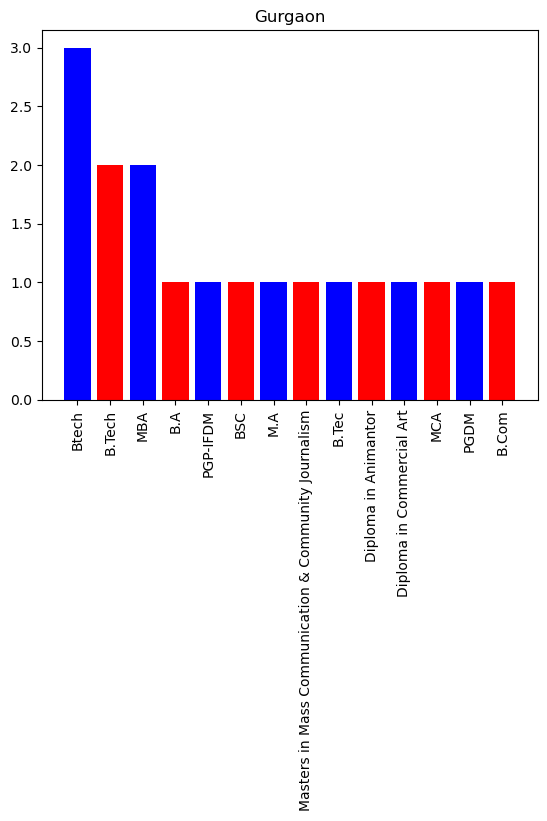

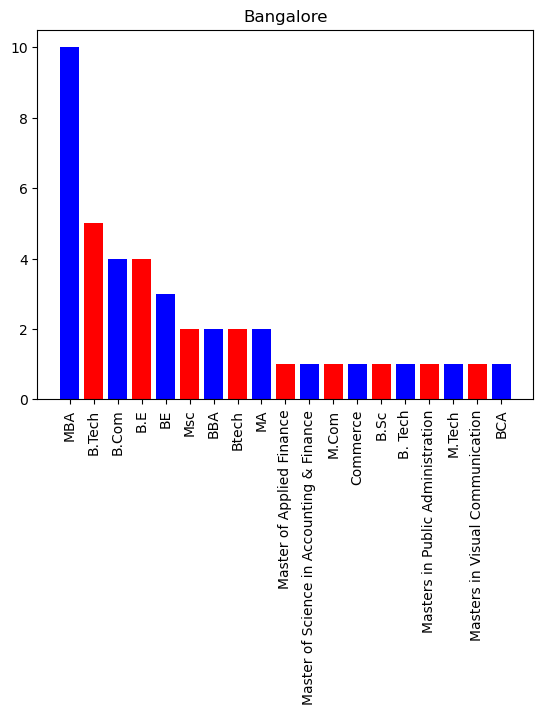

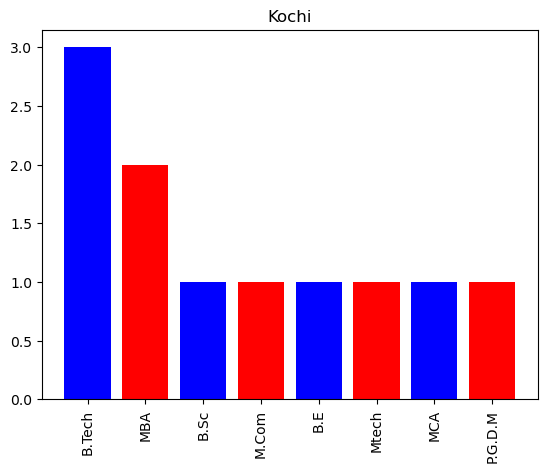

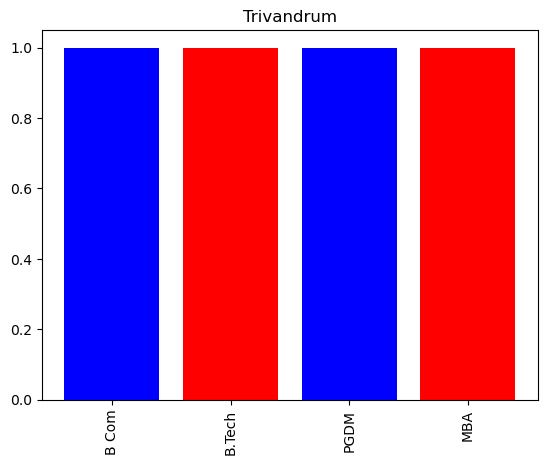

In [29]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['Qualification'].value_counts()
    qualification_names = list(val.index)
    qualification_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(qualification_names),2):
        color_list.append("blue")
        if i+1 != len(qualification_names):
            color_list.append("red")
    plt.bar(qualification_names, qualification_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()

## Notice period wise valu counts ##

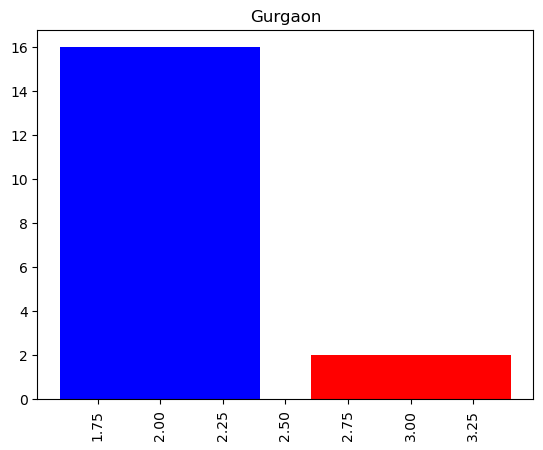

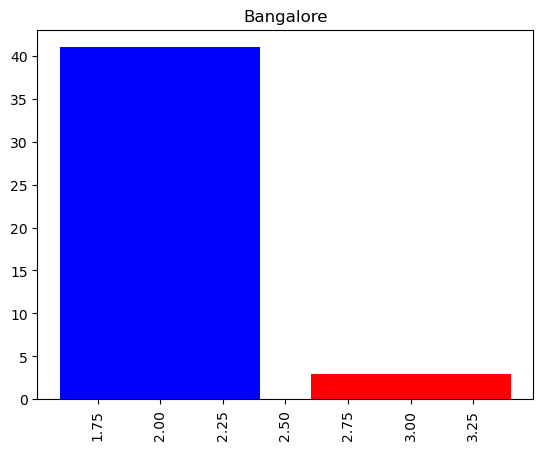

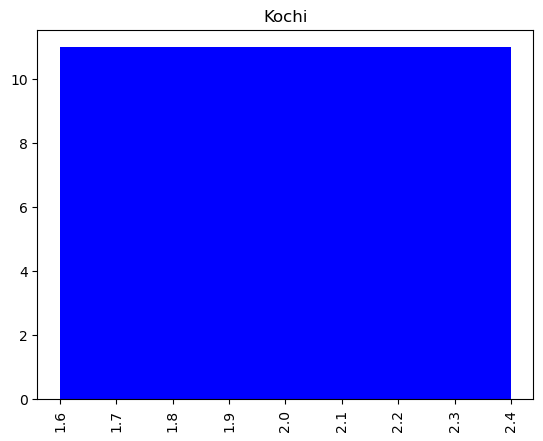

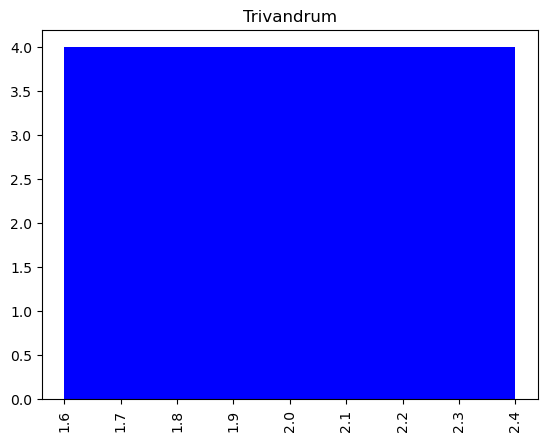

In [127]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['NoticePeriod'].value_counts()
    noticeperiod_names = list(val.index)
    noticeperiod_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(noticeperiod_names),2):
        color_list.append("blue")
        if i+1 != len(noticeperiod_names):
            color_list.append("red")
    plt.bar(noticeperiod_names, noticeperiod_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()

## Rotationshift wise value counts ##

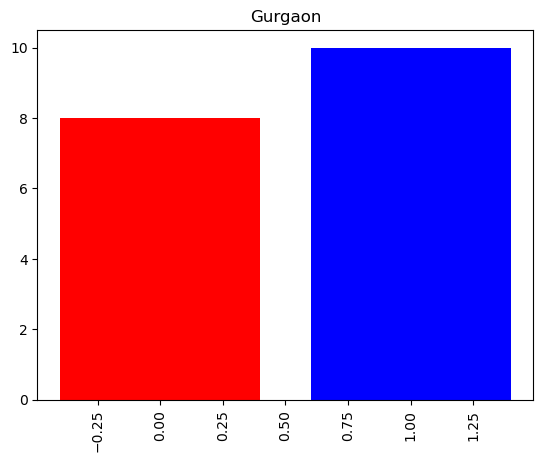

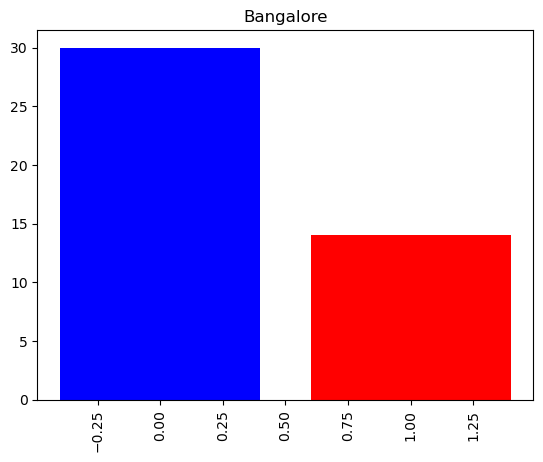

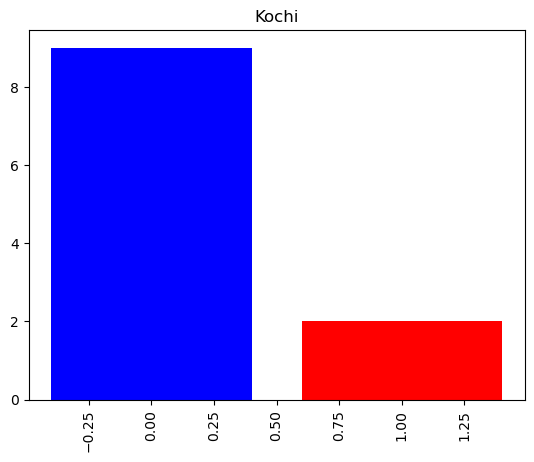

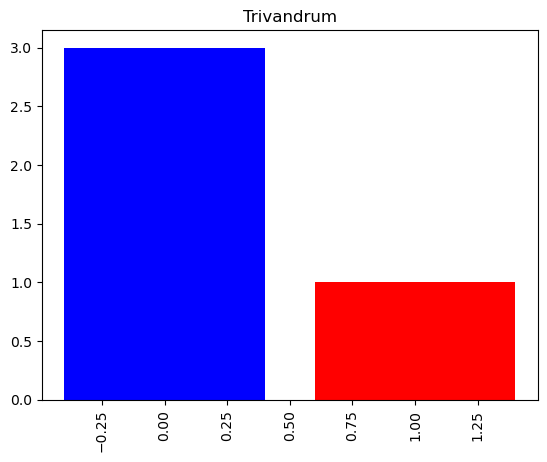

In [61]:
for center in center_list:
    temp_df = df_new[df_new['Center'] == center]
    val = temp_df['IsRotationalShift'].value_counts()
    rotationalshift_names = list(val.index)
    rotationalshift_count = list(val.values)
    #name = ["Gurgaon"]
    import matplotlib.pyplot as plt
    color_list = []
    for i in range(0,len(rotationalshift_names),2):
        color_list.append("blue")
        if i+1 != len(rotationalshift_names):
            color_list.append("red")
    plt.bar(rotationalshift_names, rotationalshift_count, color = color_list)
    #plt.bar(name, city_count)
    plt.xticks(rotation=90)
    plt.title(center)
    plt.show()

In [36]:
df_new.dtypes

Hiretype                 object
Sl3                      object
City                     object
State                    object
Source                   object
SubSource                object
ServiceLine              object
SubServiceLine           object
DepartmentDisplayName    object
Center                   object
Rank                      int64
Designation              object
NoticePeriod              int64
Qualification            object
dtype: object

## Correlation ##

In [37]:
categorical_columns = df_new.select_dtypes(['object']).columns

In [39]:
from sklearn.preprocessing import LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in df_new[categorical_columns]:
    df_new[col]= label_encoder.fit_transform(df_new[col])

In [43]:
df_new

,Hiretype,Sl3,City,State,Source,SubSource,ServiceLine,SubServiceLine,DepartmentDisplayName,Center,Rank,Designation,NoticePeriod,Qualification
0,1,6,7,8,3,14,0,10,29,1,64,5,2,2
1,1,3,3,4,0,2,0,4,18,0,66,2,2,7
2,1,7,14,9,0,8,0,2,42,0,65,12,2,13
3,1,7,3,4,3,14,0,7,1,1,65,12,2,20
4,1,8,7,1,4,3,0,10,2,1,64,5,2,12
5,1,6,11,12,3,14,0,10,30,1,65,12,2,15
6,1,9,21,14,0,4,0,1,48,0,66,3,2,12
7,1,7,3,4,3,14,0,7,45,0,65,12,2,7
8,1,7,33,5,0,8,0,2,42,2,65,12,2,7
9,1,9,8,3,0,7,0,1,48,0,63,4,3,20


In [45]:
# correlation between Center and State
print(df_new['Center'].corr(df_new['State']))
 
# correlation between Center and City
print(df_new['Center'].corr(df_new['City']))
 
# correlation between Center and Source
print(df_new['Center'].corr(df_new['Source']))

# correlation between Center and SubSource
print(df_new['Center'].corr(df_new['SubSource']))

# correlation between Center and ServiceLine
print(df_new['Center'].corr(df_new['ServiceLine']))

# correlation between Center and SubServiceLine
print(df_new['Center'].corr(df_new['SubServiceLine']))

# correlation between Center and Rank
print(df_new['Center'].corr(df_new['Rank']))

# correlation between Center and Designation
print(df_new['Center'].corr(df_new['Designation']))

# correlation between Center and Noticeperiod
print(df_new['Center'].corr(df_new['NoticePeriod']))

# correlation between Center and Qualification
print(df_new['Center'].corr(df_new['Qualification']))



-0.19878723803752313
0.13962342132309916
-0.1489836978186949
-0.17776741043773953
0.16814384837638433
0.009944630079271856
0.13102654413989667
-0.10065069718351438
-0.08028644390807857
0.07254583312329357
